# 深度学习基础

## 1. 写一个简单的神经网络吧！

我们要借助 numpy 搭一个两层的神经网络去拟合正弦函数 $sin(x)$，其中包含一个隐藏层和一个输出层。

（1）输入层 input_layer 包含 __1__ 个神经元

（2）隐藏层 hidden_layer 包含 __4__ 个神经元

（3）输出层 output_layer 包含 __1__ 个神经元

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

把这个网络用表达式写出来就是这样的：

$$ s_i^{(1)} = W_{1i}^{(1)} x_1 + b^{(1)} $$

$$ x_i^{(1)} = \sigma (s_i^{(1)}) $$

$$ s_1^{(2)} = W_{i1}^{(2)}x_i^{(1)} + b^{(2)} $$

i 就是隐藏层神经元的 index。这里有4个神经元，i 的取值范围就是1~4。为了表示方便，这里把 threshold 或者说 bias 的值 b 单独列出来了。

因为是一个回归问题所以输出层不加激活函数，第二层的 $s^{(2)}$ 就是神经网络最后的输出 output 。

这个网络中的所有参数就是 W1, W2, b1, b2

In [2]:
class NN:
    def __init__(self, num_neuron):
        self.W1 = np.random.rand(num_neuron, 1)
        self.b1 = 0
        self.W2 = np.random.rand(1, num_neuron)
        self.b2 = 0

### 基本模块：激活函数 sigmoid() 及其导数 sigmoid_d()

sigmoid 即 logistic function，它的数学表达式是这样的：

$$ sigmoid(x) = \frac{1}{1+exp(-x)} $$

sigmoid 的导数要用到 sigmoid 本身，写出来是这样的：

$$ sigmoid\_d(x) = sigmoid(x)(1-sigmoid(x)) $$


In [3]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

In [4]:
def sigmoid_d(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

In [5]:
sigmoid(np.array([-1, 0, 1]))

array([0.26894142, 0.5       , 0.73105858])

In [6]:
sigmoid_d(np.array([-1, 0, 1]))

array([0.19661193, 0.25      , 0.19661193])

### 基本模块：正向传播 forward()

有了初始化之后的参数、输入和激活函数之后就可以开始网络的正向传播了。这里我们把正向传播作为神经网络这个类的方法。

In [7]:
class NN:
    def __init__(self, num_neuron):
        # basic parameters of NN
        self.W1 = np.random.rand(num_neuron, 1)
        self.b1 = 0
        self.W2 = np.random.rand(1, num_neuron)
        self.b2 = 0
        
        # temporary parameters of NN
        self.S1 = 0
        self.X1 = 0
        self.S2 = 0
        
    def forward(x):
        self.S1 = np.dot(x, self.W1) + self.b1
        self.X1 = sigmoid(self.S1)
        self.S2 = np.dot(self.X1, self.W2) + self.b2

__tips__ ：numpy里面，\* 和 np.dot是不同的。\* 表示两个向量或者矩阵的元素两两相乘的乘法，等价于np.multiply；dot 表示向量积，不要用错了。

### 基本模块：损失函数 loss functions

损失函数一般用来衡量模型输出值于真实值之间的差异，我们希望这个差异越小越好，也就是损失函数的值越小越好。

这里我们定义：

$$ Loss(y_{predict},y) = \frac{1}{2}(y_{predict} - y)^2 $$

In [8]:
def L2(y_pred, y):
    return 0.5*(np.square(y_pred - y))

In [9]:
y1 = np.array([1.1, 2.2, 3, 4, 5])
y2 = np.array([1, 2, 3, 4, 5])
L2(y1, y2)

array([0.005, 0.02 , 0.   , 0.   , 0.   ])

### 基本模块：反向传播 backward()

In [10]:
class NN:
    def __init__(self, num_neuron, learning_rate):
        # basic parameters of NN
        self.W1 = np.random.rand(num_neuron, 1)
        self.b1 = 0
        self.W2 = np.random.rand(1, num_neuron)
        self.b2 = 0
        self.lr = learning_rate
        
        # temporary parameters of NN
        self.S1 = 0
        self.X1 = 0
        self.S2 = 0
        
        self.dW1 = None
        self.db1 = None
        self.dW2 = None
        self.db2 = None
        
    def forward(self, x):
        self.S1 = self.W1 * x + self.b1
        self.X1 = sigmoid(self.S1)
        self.S2 = np.dot(self.W2, self.X1) + self.b2
        
    def backward(self, x, y):
        delta2 = -(y - self.S2)
        self.dW2 = np.dot(delta2, self.X1.T)  # T表示矩阵的转置
        self.db2 = delta2
        
        delta1 = np.dot(self.W2.T, delta2) * sigmoid_d(self.S1)
        self.dW1 = delta1 * x
        self.db1 = delta1
                
    def update(self):
        self.W1 = self.W1 - self.lr * self.dW1
        self.b1 = self.b1 - self.lr * self.db1
        self.W2 = self.W2 - self.lr * self.dW2
        self.b2 = self.b2 - self.lr * self.db2

至此，这个神经网络的基本模块算是完成了。

###  准备数据

随机生成50个x，范围在(0,6.28)，再用 $sin(x)$ 函数生成相应的y

In [11]:
x_orig = np.random.rand(50) * 6.28
y_orig = np.sin(x_orig)

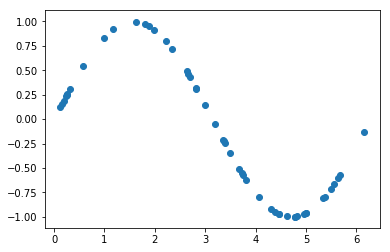

In [12]:
plt.scatter(x_orig, y_orig)

再生成一些数据备用：

In [13]:
x_val = np.arange(0, 6.28, 0.1)
y_val = np.sin(x_val)

### 训练模型

In [14]:
net = NN(num_neuron=4, learning_rate=0.1)

In [15]:
def train(x, y, num_epochs=100):
    for epoch in range(num_epochs):
        net_out = np.ones_like(y)  # 声明一个跟y一样大的向量用来存网络的输出
        for i, xi in enumerate(x):
            net.forward(xi)
            net_out[i] = np.sum(net.S2)
            net.backward(xi, y[i])
            net.update()
        if (epoch + 1) % 50 == 0:
            print 'epoch=%s, loss=%s' % (epoch, np.mean(L2(net_out, y)))

In [16]:
train(x_orig, y_orig, num_epochs=1000)

epoch=49, loss=0.05105337239472183
epoch=99, loss=0.02153674691254408
epoch=149, loss=0.01857803758568882
epoch=199, loss=0.017257868936586023
epoch=249, loss=0.01610946853275301
epoch=299, loss=0.014908106881864726
epoch=349, loss=0.013975653738283926
epoch=399, loss=0.013109817501785114
epoch=449, loss=0.012290366733133716
epoch=499, loss=0.01150216515969786
epoch=549, loss=0.010715086424053069
epoch=599, loss=0.009885804714423595
epoch=649, loss=0.008971706477283983
epoch=699, loss=0.00795265634070131
epoch=749, loss=0.00686668155277189
epoch=799, loss=0.005815092062458179
epoch=849, loss=0.004897334619592387
epoch=899, loss=0.004154830235719198
epoch=949, loss=0.0035778115023921875
epoch=999, loss=0.003134972686683754


### 使用模型

In [17]:
def predict(x):
    pred = []
    for i, xi in enumerate(x):
        net.forward(xi)
        pred.append(np.sum(net.S2))
        
    return np.array(pred)

In [18]:
y_val_pred = predict(x_val)

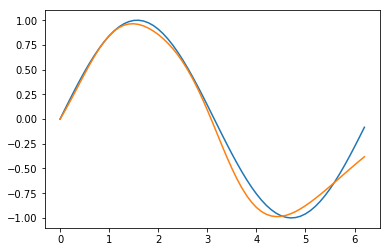

In [19]:
plt.plot(x_val, y_val, x_val, y_val_pred)

可以通过更改循环次数 num_epochs 、隐藏层神经元数量 num_neuron 、学习率 learning_rate 来改变拟合的效果。

同样需要注意过拟合的问题。

__练习__

1. 请尝试用别的激活函数来实现这个网络

2. 请尝试实现不同的网络结构 （增加隐藏层，更改神经元数量等）

3. 请尝试拟合其它函数

## 2. mxnet 实现

In [20]:
import mxnet as mx
from mxnet import nd

C:\Users\Hikaru\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### NDArray

首先，了解一个最基本的工具 NDArray。正如用 sklearn 等工具做机器学习任务的时候离不开 numpy 一样，使用 mxnet 的时候要把数据格式转换成 NDArray。

NDArray 和 nparray 之间的可以用这种方式相互转换：

In [21]:
a = np.zeros(4)
a

array([0., 0., 0., 0.])

In [22]:
# nparray -> ndarray
a_ndarray = nd.array(a)
a_ndarray


[0. 0. 0. 0.]
<NDArray 4 @cpu(0)>

In [23]:
# ndarray -> nparray
a_nparray = a_ndarray.asnumpy()
a_nparray

array([0., 0., 0., 0.], dtype=float32)

一般 nparray 能调用的函数 ndarray 都可以用相同或相似的方式调用。具体的参考文档。

https://mxnet.incubator.apache.org/api/python/ndarray/ndarray.html


### Gluon

这里我们用 Gluon 来实现上面手动搭建的二层网络。

In [24]:
from mxnet import autograd
from mxnet.gluon import data as gdata

### 生成 mxnet 能用的数据集

In [25]:
# 输入放在features里，输出放在labels里，名字可随意更改
features = nd.array(x_orig)
# features = nd.array(x_orig, ctx=mx.gpu()) 如果要在 gpu 上运行就要把数据放到 gpu 上去
labels = nd.array(y_orig)

### 读取数据

然后我们用 Gluon 自带的 data 来批量读数据。这里为了跟前面统一起来，一次只读一个数据。

In [26]:
batch_size = 1
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=False)  
# 这里的参数shuffle可以帮你打乱输入数据的顺序。由于我们这里的batch_size=1所以没有打乱的必要

可以看到是怎么批量读的

In [27]:
for x_in, y_in in data_iter:
    print x_in, y_in
    


[4.7852364]
<NDArray 1 @cpu(0)> 
[-0.99734783]
<NDArray 1 @cpu(0)>

[2.9916332]
<NDArray 1 @cpu(0)> 
[0.14939804]
<NDArray 1 @cpu(0)>

[4.9949307]
<NDArray 1 @cpu(0)> 
[-0.9603499]
<NDArray 1 @cpu(0)>

[2.6900826]
<NDArray 1 @cpu(0)> 
[0.43632478]
<NDArray 1 @cpu(0)>

[4.6302514]
<NDArray 1 @cpu(0)> 
[-0.9966286]
<NDArray 1 @cpu(0)>

[1.6233407]
<NDArray 1 @cpu(0)> 
[0.99861985]
<NDArray 1 @cpu(0)>

[5.5529447]
<NDArray 1 @cpu(0)> 
[-0.66704905]
<NDArray 1 @cpu(0)>

[0.24077204]
<NDArray 1 @cpu(0)> 
[0.23845246]
<NDArray 1 @cpu(0)>

[5.0057273]
<NDArray 1 @cpu(0)> 
[-0.9572839]
<NDArray 1 @cpu(0)>

[4.9627023]
<NDArray 1 @cpu(0)> 
[-0.9688349]
<NDArray 1 @cpu(0)>

[0.15401044]
<NDArray 1 @cpu(0)> 
[0.15340234]
<NDArray 1 @cpu(0)>

[1.8838794]
<NDArray 1 @cpu(0)> 
[0.95138854]
<NDArray 1 @cpu(0)>

[3.7269769]
<NDArray 1 @cpu(0)> 
[-0.55251956]
<NDArray 1 @cpu(0)>

[0.18819068]
<NDArray 1 @cpu(0)> 
[0.18708183]
<NDArray 1 @cpu(0)>

[3.1964564]
<NDArray 1 @cpu(0)> 
[-0.05483622]
<NDArray

### 搭建网络

需要搭建网络就必须用到 gluon 里的 nn 模块。

In [28]:
from mxnet import gluon
from mxnet.gluon import nn

然后告诉系统你要逐层搭建一个名为 net 的网络。

In [29]:
net = nn.Sequential() # 可以理解为生成了一个毫无意义的头结点

之后往里面加入隐藏层和输出层

In [30]:
net.add(nn.Dense(4, activation='sigmoid'))  # 隐藏层，即第一层，有四个神经元，有激活函数
net.add(nn.Dense(1)) # 输出层，即第二层，只有一个神经元，没有激活函数

到这里网络的基本结构就搭完了，开始初始化所有网络参数。

In [31]:
from mxnet import init
net.initialize(init.Normal(sigma=0.01))

### 损失函数

gluon 同样提供了各种损失函数，这里我们依然采用 L2 loss。

In [32]:
from mxnet.gluon import loss as gloss
loss = gloss.L2Loss()

### 开始训练

开始训练之前我们还要先定义一下优化算法。

这里使用随机梯度下降 sgd，定义学习率 learning_rate。

In [33]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [34]:
num_epochs = 1000
for epoch in range(num_epochs):
    for x_train, y_train in data_iter:
        with autograd.record():
            l2 = loss(net(x_train), y_train)
        l2.backward()
        trainer.step(batch_size)
    if (epoch + 1) % 50 == 0:
        print 'epoch=%s, loss=%s' % (epoch, loss(net(features), labels).mean().asnumpy())

epoch=49, loss=[0.09404203]
epoch=99, loss=[0.067218]
epoch=149, loss=[0.01486135]
epoch=199, loss=[0.01180108]
epoch=249, loss=[0.00997119]
epoch=299, loss=[0.00849567]
epoch=349, loss=[0.00715335]
epoch=399, loss=[0.00600629]
epoch=449, loss=[0.00516253]
epoch=499, loss=[0.0044896]
epoch=549, loss=[0.00378515]
epoch=599, loss=[0.00307214]
epoch=649, loss=[0.00246909]
epoch=699, loss=[0.0020199]
epoch=749, loss=[0.00169927]
epoch=799, loss=[0.00146615]
epoch=849, loss=[0.00128943]
epoch=899, loss=[0.00114976]
epoch=949, loss=[0.00103541]
epoch=999, loss=[0.00093888]


In [35]:
x_val_nd = nd.array(x_val)
y_val_pred_nd = net(x_val_nd)
y_val_pred = y_val_pred_nd.asnumpy()

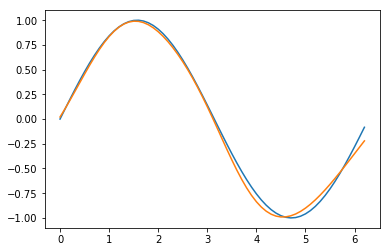

In [36]:
plt.plot(x_val, y_val, x_val, y_val_pred)

__练习__

1. 请尝试用别的激活函数来实现这个网络

2. 请尝试实现不同的网络结构 （增加隐藏层，更改神经元数量等）

3. 请尝试拟合其它函数